In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fetched.csv')
df.head()

,Title,Description,Link,Category,Publication Date
0,2024 turns out to be the worst-ever season for...,With over 80% dip in yield following adverse w...,https://www.thehindu.com/news/national/andhra-...,Business,"Wed, 22 May 2024 21:15:51 +0530"
1,Kuruvai coverage rose by 40% above normal in l...,The normal coverage is about 3.24 lakh acres f...,https://www.thehindu.com/news/national/tamil-n...,Business,"Tue, 21 May 2024 22:45:57 +0530"
2,VST ropes in Axis Bank to offer loan to farmers,This partnership is expected to enable farmers...,https://www.thehindu.com/business/agri-busines...,Business,"Tue, 21 May 2024 16:58:09 +0530"
3,Idukki gets its first women-led cardamom aucti...,NaN,https://www.thehindu.com/news/national/kerala/...,Business,"Mon, 20 May 2024 20:31:54 +0530"
4,"Chickpea imports unlikely to ease prices, yell...",Limited availability of chickpeas in the world...,https://www.thehindu.com/business/agri-busines...,Business,"Tue, 07 May 2024 22:08:21 +0530"


In [3]:
df['Category'].value_counts()

Category
Sport             800
life-and-style    699
Entertainment     600
Business          500
India             100
Science           100
World             100
Name: count, dtype: int64

Generating Article ID

In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df['article_id'] = np.arange(1, len(df) + 1)

In [5]:
df.to_csv('fetched_with_article_id.csv', index=False)

In [9]:
import matplotlib.pyplot as plt

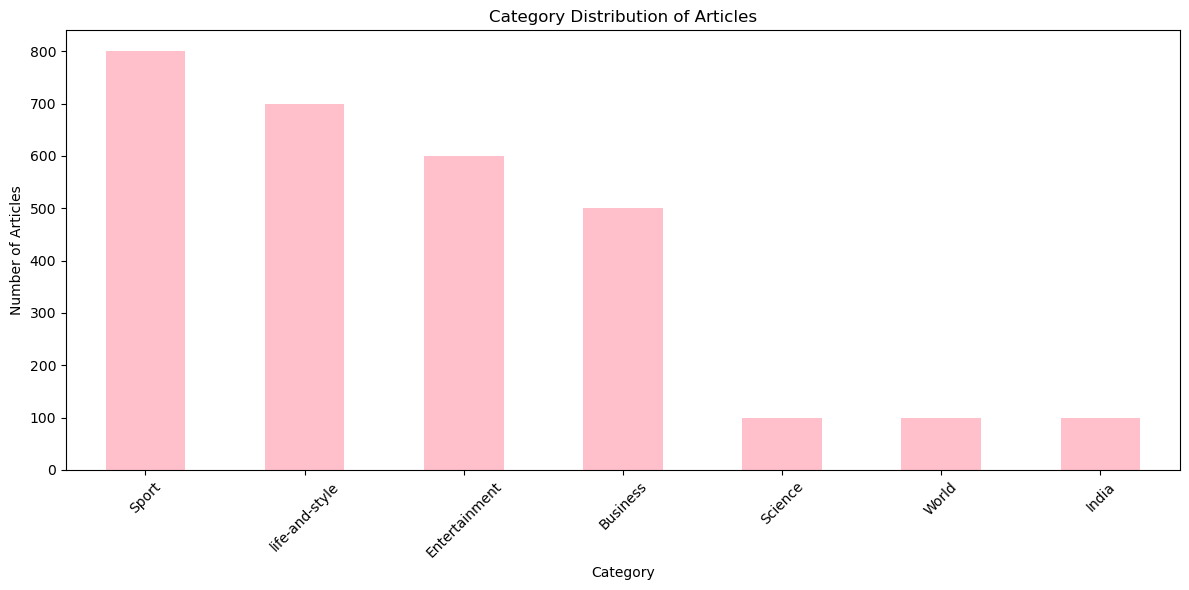

In [10]:
df1 = pd.read_csv('fetched_with_article_id.csv')
category_counts = df1['Category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='pink')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.title('Category Distribution of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

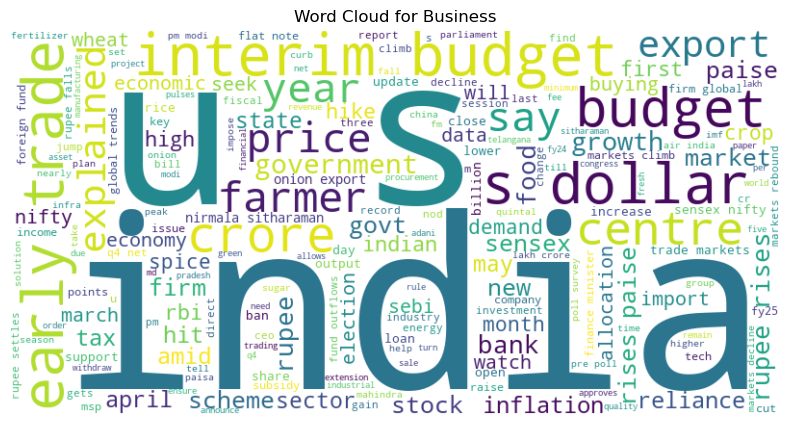

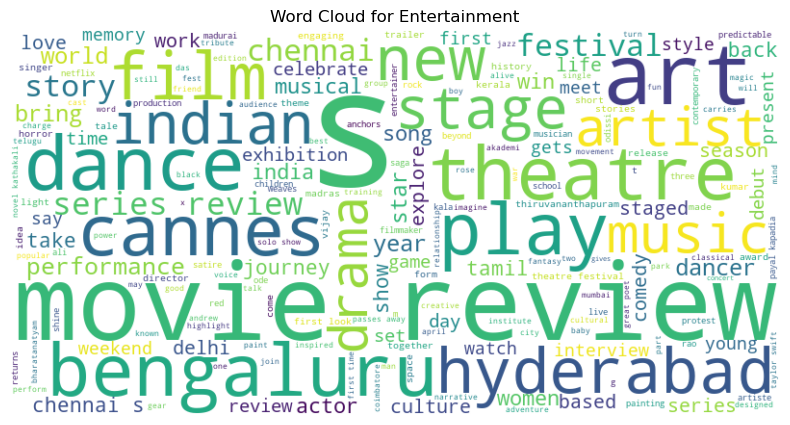

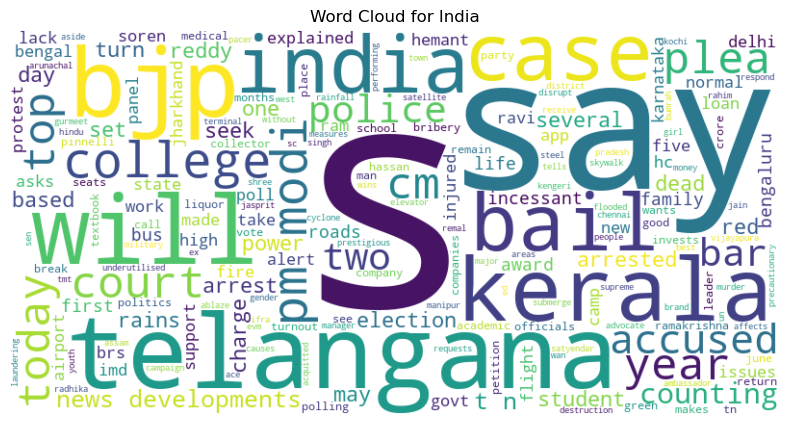

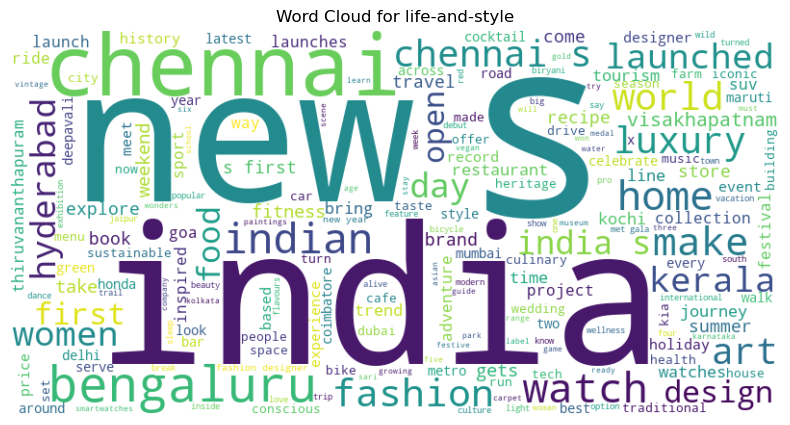

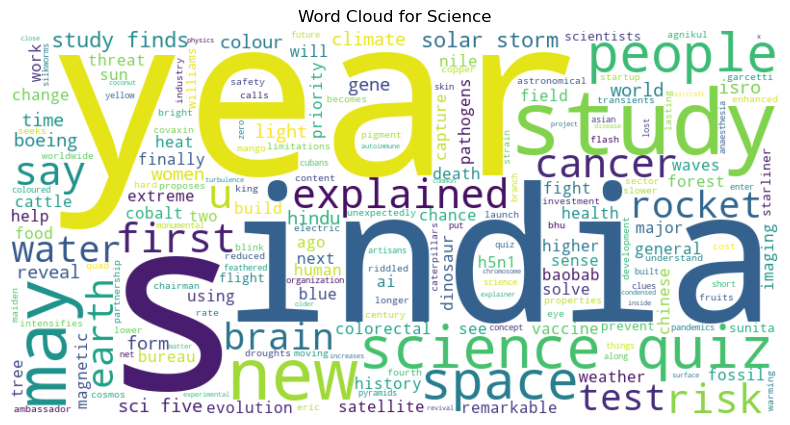

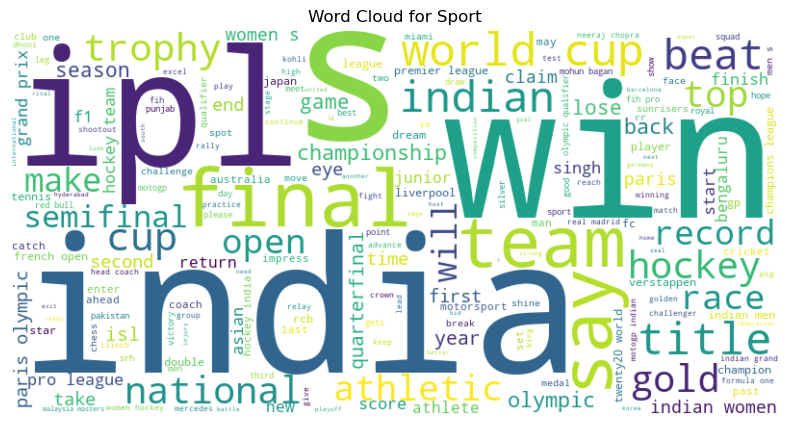

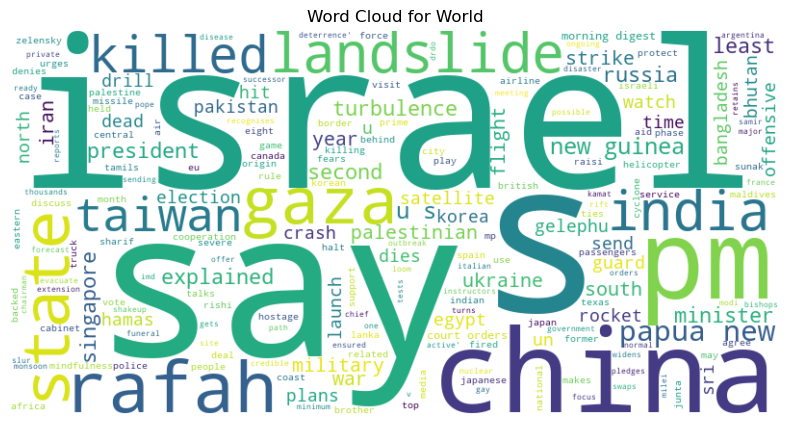

In [11]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

folder_path = 'D:/news.tsv//The_Hindu'

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Load the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        category_name = os.path.splitext(filename)[0]
        titles_text = ' '.join(df['Title'].dropna().astype(str)).lower()
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)
        
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {category_name}')
        plt.show()
        


In [13]:
articles = pd.read_csv('article.csv')

# Display the first few rows to understand the structure
print(articles.head())

                                               Title  \
0          What India’s Jewish buildings have to say   
1  Chef Amninder Sandhu’s Bawri in Goa is all abo...   
2  Palestinian athletes to be invited to Paris Ol...   
3  Interview | Call him old or call him a find, S...   
4  Saif Ali Khan, Siddharth Anand reuniting for n...   

                                         Description  \
0  Jewish-origin architecture in the country appe...   
1  Amninder Sandhu is using open-fire cooking and...   
2  The IOC head dismissed suggestions the IOC has...   
3  The lad from Bhilai made his debut in senior d...   
4  Anand and Khan had worked together on films li...   

                                                Link        Category  \
0  https://www.thehindu.com/society/history-and-c...  life-and-style   
1  https://www.thehindu.com/life-and-style/food/c...  life-and-style   
2  https://www.thehindu.com/sport/palestinian-ath...           Sport   
3  https://www.thehindu.com/sport/cric

In [18]:

articles['PublicationDate'] = pd.to_datetime(articles['Publication Date'], format='%a, %d %b %Y %H:%M:%S %z')

# Filter for articles published in the year 2024
articles_2024 = articles[articles['PublicationDate'].dt.year == 2024]

# Display the first few rows to confirm the filtering
print(articles_2024.head())

print(articles['PublicationDate'].head())


                                               Title  \
0          What India’s Jewish buildings have to say   
2  Palestinian athletes to be invited to Paris Ol...   
3  Interview | Call him old or call him a find, S...   
4  Saif Ali Khan, Siddharth Anand reuniting for n...   
5   Choreographing a dance performance in a stepwell   

                                         Description  \
0  Jewish-origin architecture in the country appe...   
2  The IOC head dismissed suggestions the IOC has...   
3  The lad from Bhilai made his debut in senior d...   
4  Anand and Khan had worked together on films li...   
5  Dancers in Hyderabad explain how they reimagin...   

                                                Link        Category  \
0  https://www.thehindu.com/society/history-and-c...  life-and-style   
2  https://www.thehindu.com/sport/palestinian-ath...           Sport   
3  https://www.thehindu.com/sport/cricket/intervi...           Sport   
4  https://www.thehindu.com/entertainm

In [19]:
# Extract the year and month from the PublicationDate
articles_2024['YearMonth'] = articles_2024['PublicationDate'].dt.to_period('M')

# Group by YearMonth and count the number of articles published each month in 2024
articles_per_month_2024 = articles_2024.groupby('YearMonth').size()

# Convert the result to a DataFrame for easier plotting
articles_per_month_2024 = articles_per_month_2024.reset_index(name='ArticleCount')

# Display the trends for 2024
print(articles_per_month_2024.head())


  YearMonth  ArticleCount
0   2024-01            91
1   2024-02           202
2   2024-03           158
3   2024-04           420
4   2024-05           919


C:\Users\DELL\AppData\Local\Temp\ipykernel_21348\3191586505.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_2024['YearMonth'] = articles_2024['PublicationDate'].dt.to_period('M')
C:\Users\DELL\AppData\Local\Temp\ipykernel_21348\3191586505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_2024['YearMonth'] = articles_2024['PublicationDate'].dt.to_period('M')


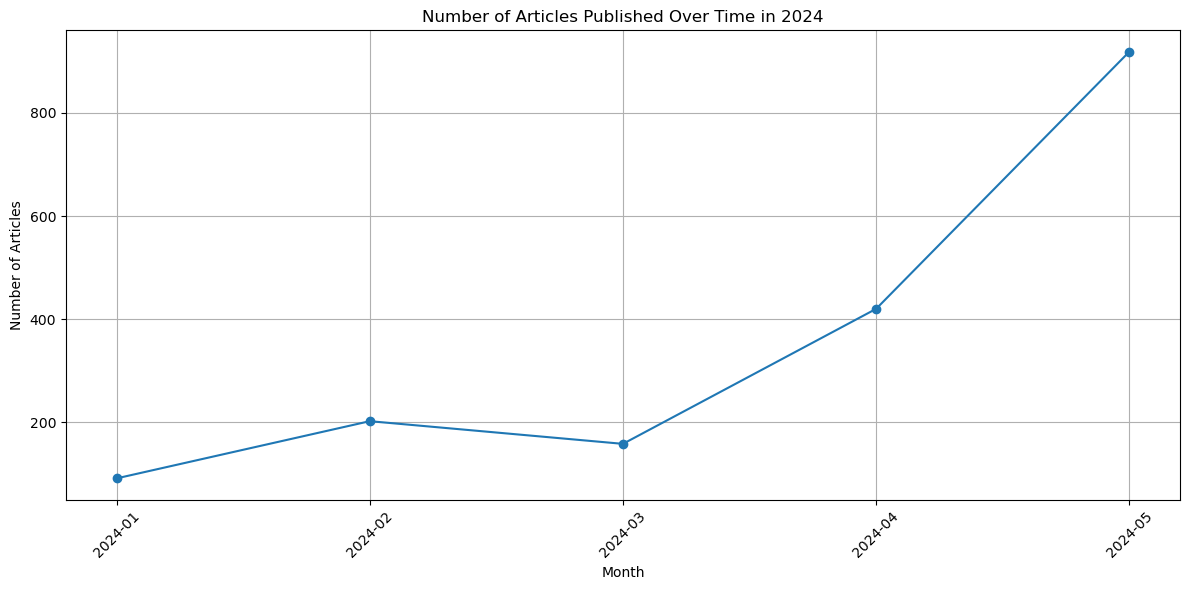

In [20]:
import matplotlib.pyplot as plt

# Plot the number of articles published each month in 2024
plt.figure(figsize=(12, 6))
plt.plot(articles_per_month_2024['YearMonth'].astype(str), articles_per_month_2024['ArticleCount'], marker='o')
plt.title('Number of Articles Published Over Time in 2024')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
# import os
# import pandas as pd

# # Define the folder path
# folder_path = 'D:/news.tsv/The_Hindu'

# # Loop through all CSV files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         # Load the CSV file
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_csv(file_path)
        
#         # Extract the category name from the filename (assuming it's the part before .csv)
#         category_name = os.path.splitext(filename)[0]
        
#         # Update the Category column with the category name
#         df['Category'] = category_name
        
#         # Save the updated DataFrame back to the CSV file
#         df.to_csv(file_path, index=False)

# print("Category column updated for all files.")


Category column updated for all files.


In [ ]:
df.shape

(2899, 6)

In [ ]:
null_description_count = df1['Description'].isnull().sum()
print("Number of null descriptions:", null_description_count)

Number of null descriptions: 457


In [ ]:
# Drop rows with null descriptions
df1.dropna(subset=['Description'], inplace=True)
print("Shape of article_data after dropping rows with null descriptions:", df1.shape)

Shape of article_data after dropping rows with null descriptions: (2442, 6)


In [ ]:
null_category_count = df1['Category'].isnull().sum()
print("Number of null category:", null_category_count)

Number of null category: 0


In [ ]:
# Drop rows with null descriptions
df1.dropna(subset=['Description'], inplace=True)

# Check the shape of the modified DataFrame
print("Shape of article_data after dropping rows with null descriptions:", df1.shape)

# Save the modified DataFrame to a new CSV file
df1.to_csv('article_data_no_null.csv', index=False)

print("Modified DataFrame saved to 'article_data_no_null.csv'.")


Shape of article_data after dropping rows with null descriptions: (2442, 6)
Modified DataFrame saved to 'article_data_no_null.csv'.


In [ ]:
import numpy as np
import pandas as pd

# Load the article data without null descriptions
article_data = pd.read_csv('article_data_no_null.csv')

# Extract the valid ArticleId values
valid_article_ids = article_data['article_id'].unique()

num_users = 1000  
num_articles = len(valid_article_ids)  # Update the number of articles based on the valid article IDs
max_session_length = 10 
max_time_spent = 300  

clickstream_data = []
for user_id in range(1, num_users + 1):
    num_sessions = np.random.randint(1, 6)  
    for session_id in range(1, num_sessions + 1):
        session_length = np.random.randint(1, max_session_length + 1)
        interactions = np.random.choice(valid_article_ids, size=session_length, replace=False)
        for idx, article_id in enumerate(interactions, start=1):
            click = np.random.choice(['Yes', 'No'], p=[0.8, 0.2])  
            time_spent = np.random.randint(1, max_time_spent + 1) if click == 'Yes' else 0
            clickstream_data.append({
                'UserId': user_id,
                'SessionId': f"{user_id}_{session_id}",
                'ArticleId_served': article_id,
                'Click': click,
                'Time_Spent': time_spent
            })

clickstream_df = pd.DataFrame(clickstream_data)

# Save the clickstream data to a CSV file
clickstream_df.to_csv('D:/news.tsv/Feed parser/clickstream_data.csv', index=False)

print("Clickstream data generated and saved.")


In [23]:
import seaborn as sns


In [21]:
clickstream_data = pd.read_csv('clickstream_data.csv')
filtered_data = clickstream_data[clickstream_data['Time_Spent'] > 0]

# Calculate average time spent
average_time_spent = filtered_data['Time_Spent'].mean()

# Calculate variance of time spent
variance_time_spent = filtered_data['Time_Spent'].var()
print(f"Average Time Spent on an Article: {average_time_spent:.2f} seconds")
print(f"Variance in Time Spent on Articles: {variance_time_spent:.2f}")

Average Time Spent on an Article: 150.84 seconds
Variance in Time Spent on Articles: 7505.18


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


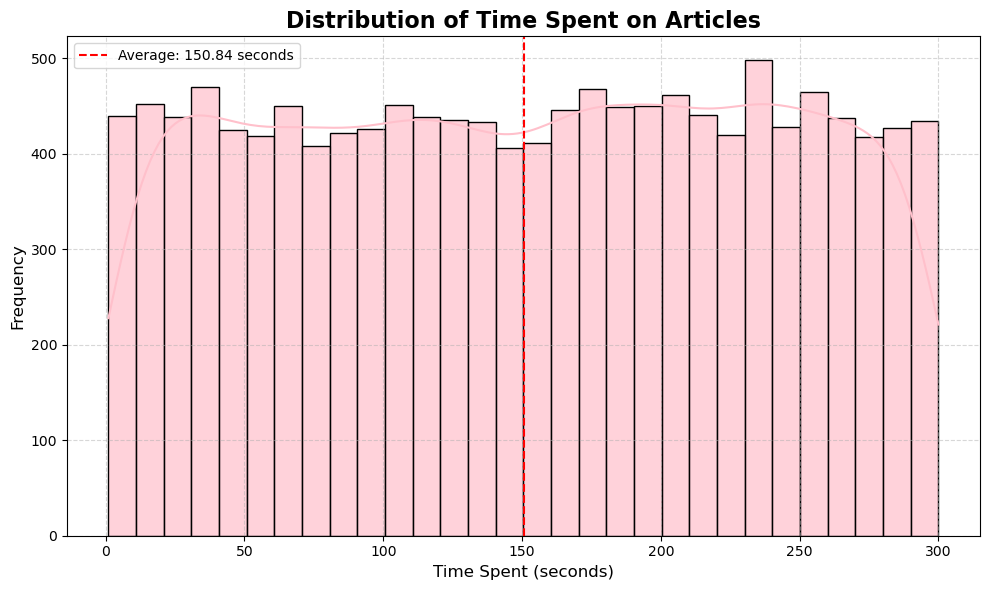

In [28]:
# Plot histogram of time spent
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Time_Spent'], bins=30, kde=True, color='pink', edgecolor='black', alpha=0.7)
plt.title('Distribution of Time Spent on Articles', fontsize=16, fontweight='bold')
plt.xlabel('Time Spent (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(average_time_spent, color='red', linestyle='dashed', linewidth=1.5, label=f'Average: {average_time_spent:.2f} seconds')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()